In [35]:
import numpy as np
import pandas as pd
import ramanspy as rp
import matplotlib.pyplot as plt

<Axes: title={'center': 'Raman spectra'}, xlabel='Raman shift (cm$^{{{-1}}}$)', ylabel='Intensity (a.u.)'>

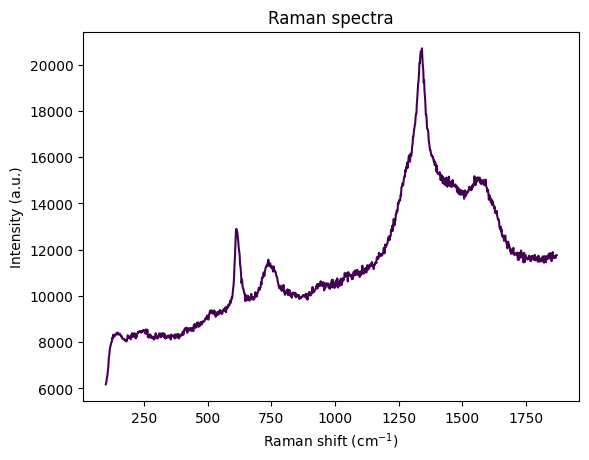

In [3]:
raman_spectra = rp.load.renishaw("./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_O2_cutoff_1.wdf")

rp.plot.spectra(raman_spectra[-1])

In [10]:
pipe = rp.preprocessing.Pipeline([
    #rp.preprocessing.denoise.SavGol(window_length=9, polyorder=3),
    rp.preprocessing.baseline.ASLS()
])

<Axes: title={'center': 'Raman spectra'}, xlabel='Raman shift (cm$^{{{-1}}}$)', ylabel='Intensity (a.u.)'>

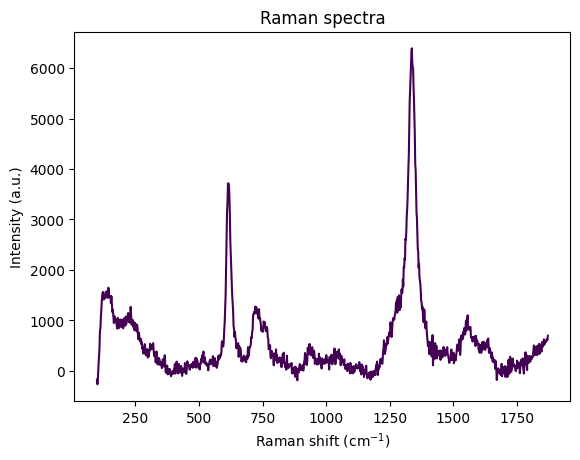

In [13]:
preprocessed_raman_spectra = pipe.apply(raman_spectra)
rp.plot.spectra(preprocessed_raman_spectra[100])

In [20]:
datalist = raman_spectra.tolist()
df = pd.DataFrame(datalist)
df.iloc[1][0]

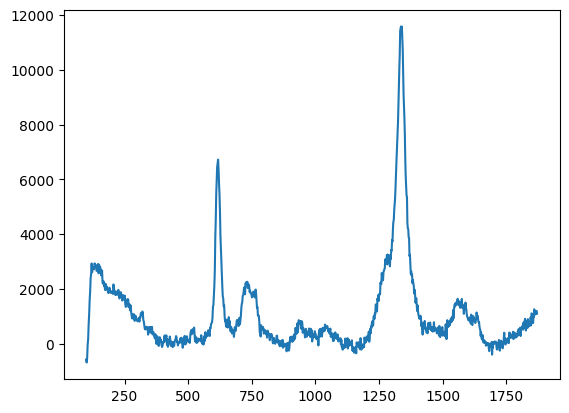

In [31]:
preprocessed_raman_spectra.save("test.pkl")
df2 = pd.read_pickle("test.pkl")
intensity = df2[0].spectral_data
shift = df2[0].spectral_axis
plt.plot(shift,intensity)

<class 'numpy.ndarray'>


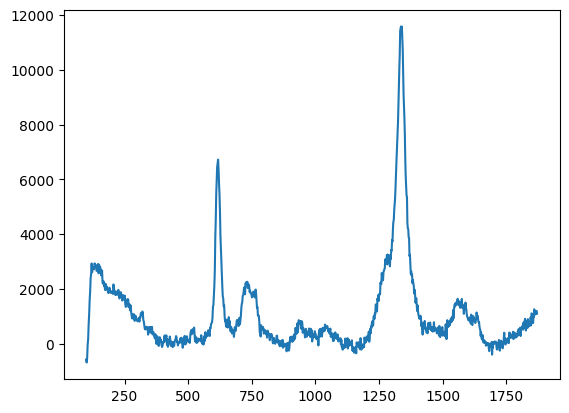

In [34]:
intensity = preprocessed_raman_spectra[0].spectral_data
shift = preprocessed_raman_spectra[0].spectral_axis
print(np.array_equal(intensity))
plt.plot(shift,intensity)

In [53]:
from renishawWiRE import WDFReader as wdf
import pybaselines as pbl

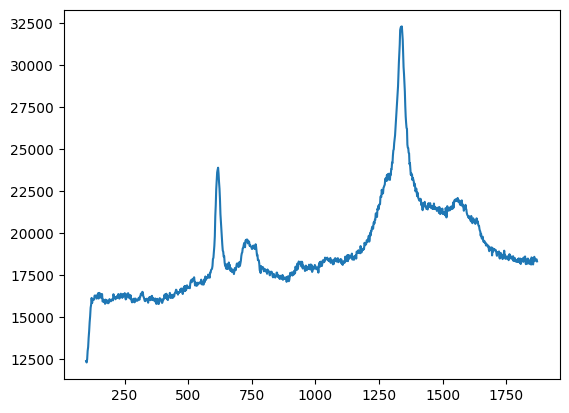

In [51]:
path = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_O2_cutoff_1.wdf"
f = wdf(path)

wavenumber = f.xdata
spectra = f.spectra.T
#print(type(spectra))
#print(wavenumber.shape)
#print(spectra.T[0].shape)
plt.plot(wavenumber,spectra.T[0]);

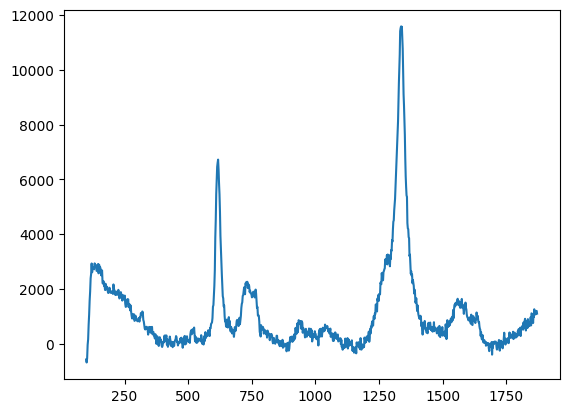

In [62]:
spectra_bl,_ = pbl.whittaker.asls(spectra.T[0])
#print(spectra_bs)
spectra_bs = spectra.T[0] - spectra_bl
plt.plot(wavenumber,spectra_bs)

C:\Users\flahertylab\AppData\Local\Temp\ipykernel_17100\3689506676.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


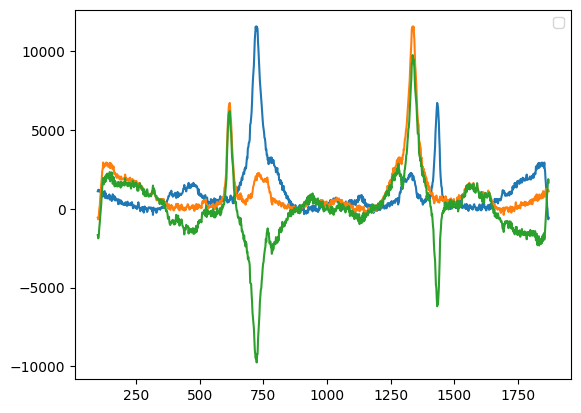

In [67]:
diff = spectra_bs - intensity

plt.plot(wavenumber, intensity)
plt.plot(wavenumber, spectra_bs)
plt.plot(wavenumber, diff)
plt.legend()

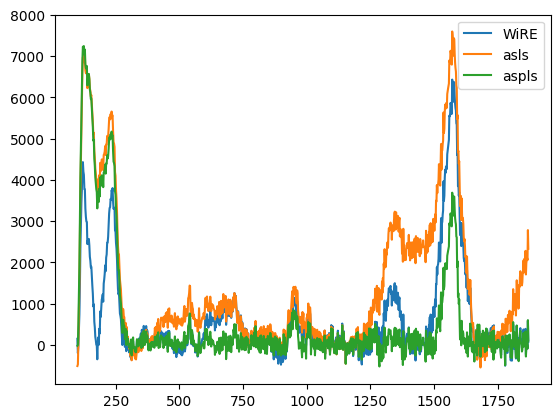

In [147]:
# Double checking if methods are different
path = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1.wdf"
f = wdf(path)
path_WiRE = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1_BS12.wdf"
f_WiRE = wdf(path_WiRE)

test_index = 175

wavenumber_WiRE = f_WiRE.xdata
spectra_WiRE = f_WiRE.spectra
WiRE_test = spectra_WiRE[test_index]
plt.plot(wavenumber_WiRE, WiRE_test)

wavenumber_wdf = f.xdata
spectra_wdf = f.spectra
wdf_test = spectra_wdf[test_index]
wdf_spectra_bl,_ = pbl.whittaker.asls(wdf_test)
wdf_result = wdf_test - wdf_spectra_bl
wdf_diff = WiRE_test - wdf_result
plt.plot(wavenumber, wdf_result)

wavenumber_wdf = f.xdata
spectra_wdf = f.spectra
wdf_test = spectra_wdf[test_index]
wdf_spectra_bl,_ = pbl.whittaker.aspls(wdf_test)
wdf_result = wdf_test - wdf_spectra_bl
wdf_diff = WiRE_test - wdf_result
plt.plot(wavenumber, wdf_result)
plt.legend(["WiRE","asls","aspls"])


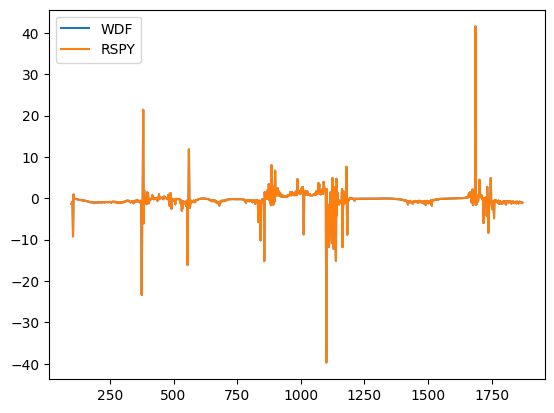

In [81]:
plt.plot(wavenumber,wdf_diff/wdf_result)
plt.plot(wavenumber,RSPY_diff/RSPY_result)
plt.legend(["WDF","RSPY"])

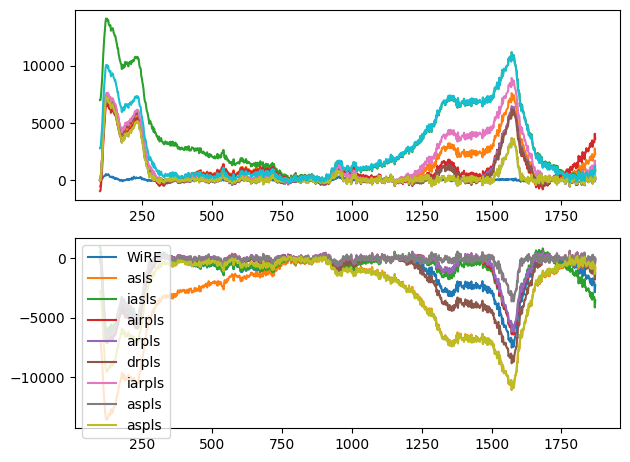

In [149]:
bs_methods = ["asls","iasls","airpls","arpls","drpls","iarpls","aspls","aspls","derpsalsa"]
plt.subplot(2,1,1)
plt.plot(wavenumber, WiRE_test)
result_spectra = []
result_diff = []
for i in bs_methods:
    method = getattr(pbl.whittaker, i)
    wdf_spectra_bl,_ = method(wdf_test)
    wdf_result = wdf_test - wdf_spectra_bl
    wdf_diff = WiRE_test - wdf_result
    result_spectra.append(wdf_result)
    result_diff.append(wdf_diff)
    plt.subplot(2,1,1)
    plt.plot(wavenumber, wdf_result)
    plt.subplot(2,1,2)
    plt.plot(wavenumber, wdf_diff)

legend = ["WiRE","asls","iasls","airpls","arpls","drpls","iarpls","aspls","aspls","derpsalsa"]

err = []
for j in result_diff:
    bs_err = sum(j**2)
    err.append(bs_err)

plt.legend(legend)
plt.tight_layout();

<BarContainer object of 9 artists>

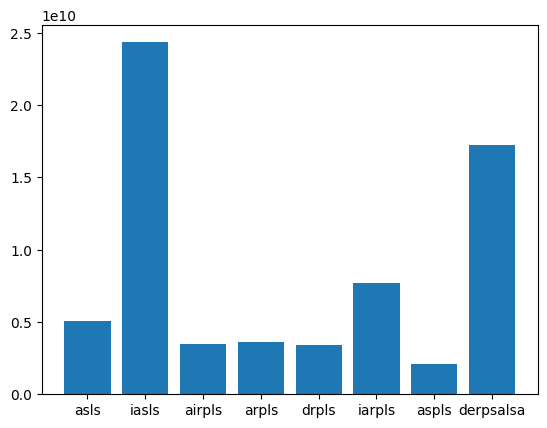

In [150]:
plt.bar(bs_methods, err)

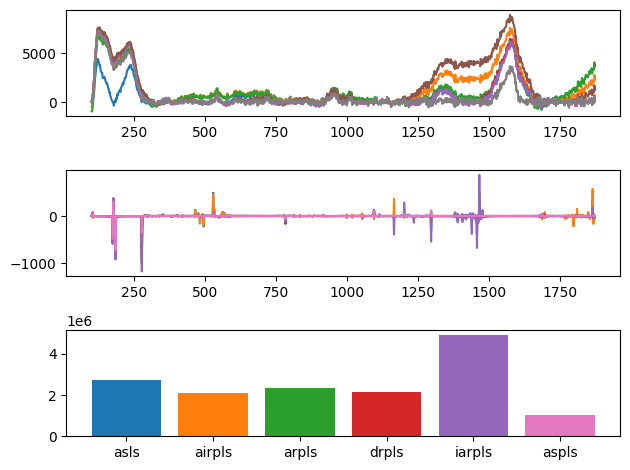

In [175]:
path = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1.wdf"
f = wdf(path)
path_WiRE = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1_BS12.wdf"
f_WiRE = wdf(path_WiRE)


test_index = 175

wavenumber_WiRE = f_WiRE.xdata
spectra_WiRE = f_WiRE.spectra
WiRE_test = spectra_WiRE[test_index]

wavenumber_wdf = f.xdata
spectra_wdf = f.spectra
wdf_test = spectra_wdf[test_index]

bs_methods = ["asls","airpls","arpls","drpls","iarpls","aspls","aspls"]
plt.subplot(3,1,1)
plt.plot(wavenumber, WiRE_test)
result_spectra = []
result_diff = []
err = []
for i in bs_methods:
    method = getattr(pbl.whittaker, i)
    wdf_spectra_bl,_ = method(wdf_test)
    wdf_result = wdf_test - wdf_spectra_bl
    wdf_diff = (WiRE_test - wdf_result) / WiRE_test
    bs_err = sum(wdf_diff**2)
    err.append(bs_err)
    result_spectra.append(wdf_result)
    result_diff.append(wdf_diff)
    plt.subplot(3,1,1)
    plt.plot(wavenumber, wdf_result)
    plt.subplot(3,1,2)
    plt.plot(wavenumber, wdf_diff)
    plt.subplot(3,1,3)
    plt.bar(i,bs_err)

legend = ["WiRE","asls","iasls","airpls","arpls","drpls","iarpls","aspls","aspls","derpsalsa"]


#plt.legend(legend)
plt.tight_layout();

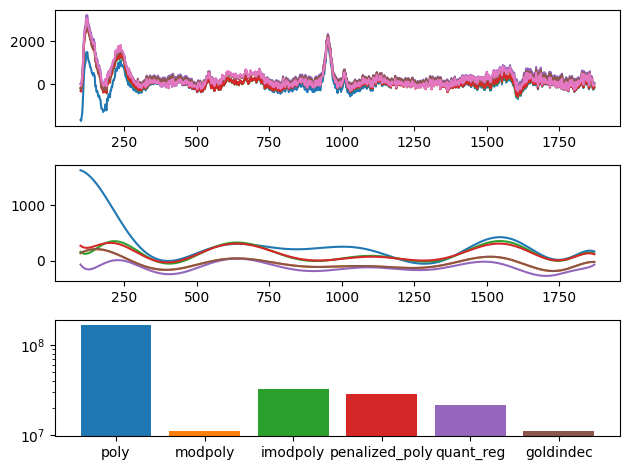

In [173]:
path = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1.wdf"
f = wdf(path)
path_WiRE = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1_BS12.wdf"
f_WiRE = wdf(path_WiRE)


test_index = 10

wavenumber_WiRE = f_WiRE.xdata
spectra_WiRE = f_WiRE.spectra
WiRE_test = spectra_WiRE[test_index]

wavenumber_wdf = f.xdata
spectra_wdf = f.spectra
wdf_test = spectra_wdf[test_index]

bs_methods = ["poly","modpoly","imodpoly","penalized_poly","quant_reg","goldindec"]

result_spectra = []
result_diff = []
err = []
for i in bs_methods:
    method = getattr(pbl.polynomial, i)
    wdf_spectra_bl,_ = method(wdf_test, poly_order=12)
    wdf_result = wdf_test - wdf_spectra_bl
    wdf_diff = WiRE_test - wdf_result
    bs_err = sum(wdf_diff**2)
    err.append(bs_err)
    result_spectra.append(wdf_result)
    result_diff.append(wdf_diff)
    plt.subplot(3,1,1)
    plt.plot(wavenumber, wdf_result)
    plt.subplot(3,1,2)
    plt.plot(wavenumber, wdf_diff)
    plt.subplot(3,1,3)
    plt.bar(i,bs_err)
    plt.yscale('log')

legend = ["WiRE","poly","modpoly","imodpoly","penalized_poly","loess","quant_reg","goldindec"]

plt.subplot(3,1,1)
plt.plot(wavenumber, WiRE_test)
#plt.legend(legend)
plt.tight_layout();

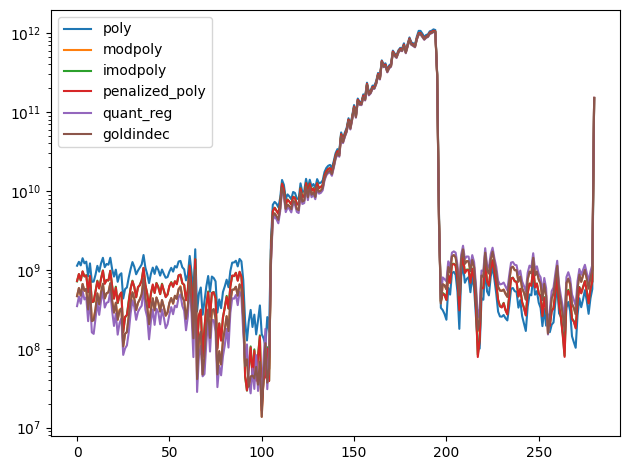

In [165]:
path = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1.wdf"
f = wdf(path)
path_WiRE = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1_BS12.wdf"
f_WiRE = wdf(path_WiRE)

wavenumber_WiRE = f_WiRE.xdata
spectra_WiRE = f_WiRE.spectra

wavenumber_wdf = f.xdata
spectra_wdf = f.spectra


bs_methods = ["poly","modpoly","imodpoly","penalized_poly","quant_reg","goldindec"] #"loess",
#bs_methods = ["asls"]
x = np.arange(len(spectra_WiRE))

total_err = []
for i in bs_methods:
    method = getattr(pbl.polynomial, i)
    result_spectra = []
    result_diff = []
    method_err = []
    for j,k in enumerate(spectra_wdf):
        WiRE_test = spectra_WiRE[j] 
        wdf_spectra_bl,_ = method(k, poly_order=12)
        wdf_result = wdf_test - wdf_spectra_bl
        wdf_diff = WiRE_test - wdf_result
        bs_err = sum(wdf_diff**2)
        result_spectra.append(wdf_result)
        result_diff.append(wdf_diff)
        method_err.append(bs_err)
    
    total_err.append(method_err)

for i,v in enumerate(total_err):
    plt.plot(x,v)
legend = ["poly","modpoly","imodpoly","penalized_poly","quant_reg","goldindec"] #"loess",
plt.legend(legend)
plt.yscale('log')
plt.tight_layout();

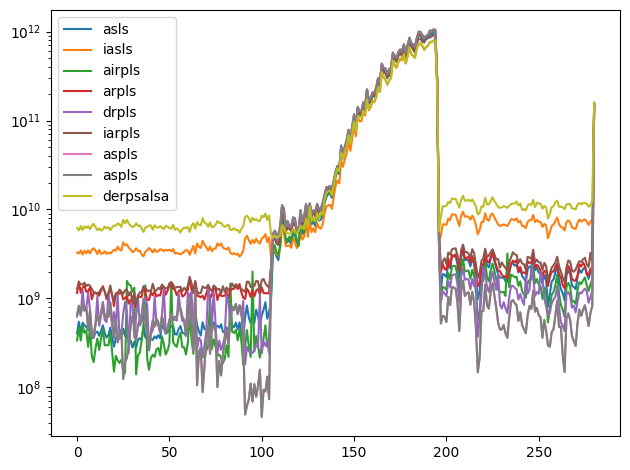

In [159]:
path = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1.wdf"
f = wdf(path)
path_WiRE = "./data/ESS-1-135_20ppm_40kPaO2_2kPaC2H4_PB_O2_cutoff_1_BS12.wdf"
f_WiRE = wdf(path_WiRE)

wavenumber_WiRE = f_WiRE.xdata
spectra_WiRE = f_WiRE.spectra

wavenumber_wdf = f.xdata
spectra_wdf = f.spectra


bs_methods = ["asls","iasls","airpls","arpls","drpls","iarpls","aspls","aspls","derpsalsa"]
#bs_methods = ["asls"]
x = np.arange(len(spectra_WiRE))

total_err = []
for i in bs_methods:
    method = getattr(pbl.whittaker, i)
    result_spectra = []
    result_diff = []
    method_err = []
    for j,k in enumerate(spectra_wdf):
        WiRE_test = spectra_WiRE[j] 
        wdf_spectra_bl,_ = method(k)
        wdf_result = wdf_test - wdf_spectra_bl
        wdf_diff = WiRE_test - wdf_result
        bs_err = sum(wdf_diff**2)
        result_spectra.append(wdf_result)
        result_diff.append(wdf_diff)
        method_err.append(bs_err)
    
    total_err.append(method_err)

for i,v in enumerate(total_err):
    plt.plot(x,v)
legend = ["asls","iasls","airpls","arpls","drpls","iarpls","aspls","aspls","derpsalsa"]
plt.legend(legend)
plt.yscale('log')
plt.tight_layout();